# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 02/2022

Content based on the [NLTK book](https://www.nltk.org/book/). <br>

You can find Chapter 4 [here](https://www.nltk.org/book/ch04.html).

# CONTENT

1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
3. Processing Raw Text
4. [Writing Structured Programs](#structure)
    1. [Back to the Basics](#BTB)
        1. [Assigment](#assignment)
        2. [Equality](#equality)
        3. [Conditionals](#conditionals)
    1. [Sequences](#seq)
        1. [Operating on Sequence Types](#operseq)
        1. [Combining Different Sequence Types](#difseq)
        1. [Generator Expressions](#generator)
    1. [Questions of Style](#style)
        1. [Python Coding Style](#pythonstyle)
        2. [Procedural vs Declarative Style](#provsdec)
    1. [Functions: The Foundation of Structured Programming](#functions)
        1. [Function Inputs and Outputs](#inout)
        1. [Parameter Passing](#parameter)
        1. [Variable Scope](#scope)
        1. [Checking Parameter Types](#paratypes)
        1. [Functional Decomposition](#decomposition)
        1. [Documenting Functions](#documenting)
    1. [Doing More with Functions](#functions2)
        1. [Functions as Arguments](#funasarg)
        1. [Accumulative Functions](#accufun)
        1. [High-Order Functions](#highorder)
        1. [Named Arguments](#namedarg)
    1. [Program Development](#dev)
        1. [Structure of a Python Module](#modulestructure)
        1. [Multi-Module Programs](#multimodule)
        1. [Sources of Error](#error)
        1. [Debugging Techniques](#debug)
        1. [Defensive Programming](#defprogramming)
    1. [Algorithm Design](#algorithm)
        1. [Recursion](#recursion)
        1. [Space-Time Tradeoffs](#tradeoffs)
        1. [Dynamic Programming](#dynamic)
    1. [A Sample of Python Libraries](#samplelibs)
        1. [Matplotlib](#matplotlib)
        1. [NetworkX](#networkx)

<a name="structure"></a>
# 4. Writing Structured Programs

<a name="BTB"></a>
# 4.1 Back To Basics
1. [Assigment](#assignment)
2. [Equality](#equality)
3. [Conditionals](#conditionals)

<a name="assignment"></a>
## 4.1.1 Assignment subtleties.

In [1]:
# assign str to var
foo = 'Monty'

# 'copy' var
bar = foo

# change valueu
foo = 'Python'

# print bar
bar

'Monty'

This behaves as expected because `bar` is a **copy** of `foo`, thus, when `foo` is overwritten `bar` is not affected.

In [2]:
# assign list to var
foo = ['Monty', 'Python']

# 'copy' object
bar = foo

# change value
foo[1] = 'Bodkin'

# print bar
bar

['Monty', 'Bodkin']

The "value" of a **structured object**, such as a list, is actually just a **reference to the object**.

The line `bar = foo` does not copy the **contents** of a the variable, only its **object reference**.

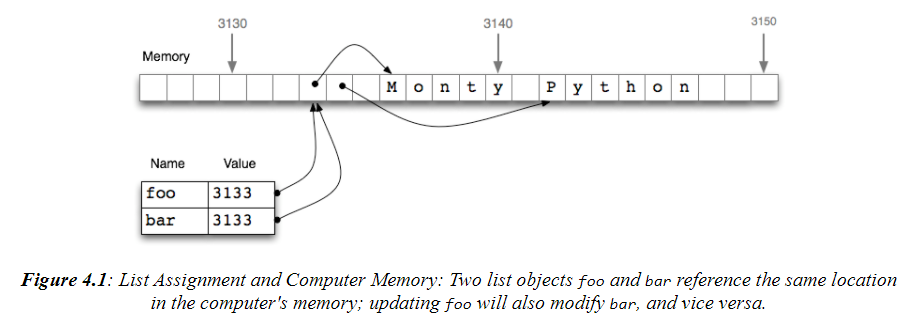

In [5]:
# create nested list
nested = [ [] ] * 3
print(nested,"\n")

# populate nested list
nested[1].append('Python')
print(nested, "\n")

# overwrite value
nested[1] = ['Monty']

# print list
nested

[[], [], []] 

[['Python'], ['Python'], ['Python']] 



[['Python'], ['Monty'], ['Python']]

To **copy the items from a list** `foo` to a new list `bar`, you can write **`bar = foo[:]`**. 

This copies the object references **inside the list**. 

To copy a structure without copying any object references, use **`copy.deepcopy()`**.

In [11]:
# create a list
foo = [1, 2, 3]

# copy list's items
bar = foo[:]

# change value
foo[1] = 4

# print lists
print(f"Foo: {foo} \n")
print(f"Bar: {bar}")

Foo: [1, 4, 3] 

Bar: [1, 2, 3]


<a name="equality"></a>
## 4.1.2 Equality

Python provides **two ways** to check that a pair of items are the same.

The **`is`** operator tests for **object identity**.

In [12]:
size = 5
python = ['Python']
snake_nest = [python] * size

# check equality
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest [4]

True

In [13]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest [4]

True

We can see that it is the **same exact object**.

In [15]:
import random

position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

Here we put an **equal object** to the rest but it is **not of the same identity**.

In [16]:
# check equality
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest [4]

True

In [17]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest [4]

False

You can do several **pairwise tests** to discover which position contains the interloper, but the **`id()`** function makes detection easier.

In [18]:
[id(snake) for snake in snake_nest]

[1543181264576, 1543181264576, 1543181264576, 1543181267200, 1543181264576]

This reveals that the **3rd item of the list has a distinct identifier**.

<a name="conditionals"></a>
## 4.1.3 Conditionals

An **`elif`** clause gives us more information than a bare **`if`** clause as it lets us know that the conditiong of the **main `if`** clause was not satisfied.

In [21]:
animals = ['cat', 'dog']

if 'cat' in animals:
    print(1)
if 'dog' in animals:
    print(2)

1
2


In [19]:
animals = ['cat', 'dog']

if 'cat' in animals:
    print(1)
elif 'dog' in animals:
    print(2)

1


The functions **`all()`** and **`any()`** can be applied to a list (or other sequence) to check whether all or any items meet some condition.

In [22]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']

print(all(len(w) > 4 for w in sent))

print(any(len(w) > 4 for w in sent))

False
True


<a name="sequences"></a>
# 4.2 Sequences
1. [Operating on Sequence Types](#operseq)
1. [Combining Different Sequence Types](#difseq)
1. [Generator Expressions](#generator)

<a name="operseq"></a>
## 4.2.1 Operating on Sequence Types

**Tuples** are formed with the **comma** operator and **typically enclosed in parentheses**.

In [23]:
# create a tuple
t = 'walk', 'fem', 3
print(t)
print(t[0])
print(len(t))

('walk', 'fem', 3)
walk
3


In [25]:
my_string = 'Bonjour'
my_list = ['Hello', 'Hi']
my_tuple = (5, 'Bye')

my_string[1], my_list[1], my_tuple[1]

('o', 'Hi', 'Bye')

Notice in this code sample that we **computed multiple values on a single line, separated by commas**. 

These comma-separated expressions are actually just **tuples**.

Python allows us to omit the parentheses around tuples if there is **no ambiguity**. 

When we print a tuple, the parentheses are always displayed. 

By using tuples in this way, we are **implicitly aggregating items together**.

We can **iterate** over the items in a sequence **`s`** in a variety of useful ways.

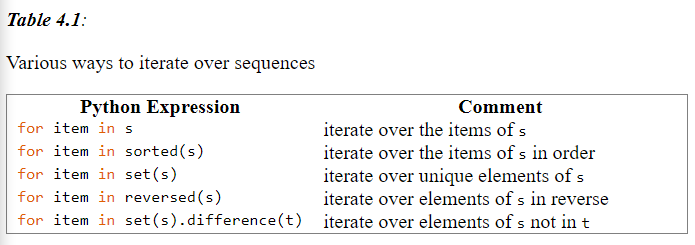

The sequence functions illustrated in 4.1 can be **combined** in various ways.

For example, to get **unique elements** of **`s` sorted in reverse**, use **`reversed(sorted(set(s)))`**. 

We can **randomize the contents** of a list s before iterating over them, using **`random.shuffle(s)`**.

We can **convert between these sequence types**.

For example, **`tuple(s)`** converts any kind of sequence into a tuple, and **`list(s)`** converts any kind of sequence into a list.

We can convert a **list of strings to a single string** using the **`join()`** function, e.g. **`':'.join(words)`**.

Some other objects, such as a **FreqDist**, can be converted into a sequence (using list() or sorted()) and support iteration.

There are also functions that **modify the structure of a sequence** and which can be handy for language processing. 

Thus, **`zip()`** takes the items of two or more sequences and "zips" them together into a single list of tuples. 

Given a sequence **`s`**, **`enumerate(s)`** returns pairs consisting of an index and the item at that index.

In [27]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']

tags = ['noun', 'verb', 'prep', 'det', 'noun']

print(zip(words, tags),"\n")

print(list(zip(words, tags)))

list(enumerate(words))


[('I', 'noun'), ('turned', 'verb'), ('off', 'prep'), ('the', 'det'), ('spectroroute', 'noun')]


[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

It is a **widespread feature** of Python 3 and NLTK 3 to **only perform computation when required** (a feature known as **"lazy evaluation"**). 

If you ever see a result like **`<zip object at 0x10d005448>`** when you expect to see a sequence, you can **force the object to be evaluated** just by putting it in a context that expects a sequence, like list(x), or for item in x.

For some NLP tasks it is necessary to **cut up a sequence into two or more parts**. 

For instance, we might want to **"train" a system on 90% of the data** and test it on the remaining 10%. 

To do this we decide the **location where we want to cut the data**, then cut the sequence at that location.

In [49]:
from nltk.corpus import nps_chat

text = nps_chat.words()

# check length
print("The length of the text is: {}\n".format(len(text)))

# extract 90% of the text
cut = int(0.9 * len(text))
# check length of cut
print("The length of the 90% of text is: {}\n".format(cut))

# split train and test data
training_data, test_data = text[:cut], text[cut:]

# check equality
print(text == training_data + test_data)

# check ratio
len(training_data)/ len(test_data)

The length of the text is: 45010

The length of the 90% of text is: 40509

True


9.0

<a name="difseq"></a>
## 4.2.2 Combining Different Sequence Types

We can **combine these 3 sequence types** to perform various tasks.

In [44]:
# tokenize string
words = 'I turned off the spectroroute'.split()
print("Words: {}\n".format(words))

# create (length, word) pairs
word_length = [(len(word), word) for word in words]
print("Tuples: {}\n".format(word_length))

# sort tuples in place
word_length.sort()

# join sorted words back & discard length
' '.join(w for (_, w) in word_length)

Words: ['I', 'turned', 'off', 'the', 'spectroroute']

Tuples: [(1, 'I'), (6, 'turned'), (3, 'off'), (3, 'the'), (12, 'spectroroute')]



'I off the turned spectroroute'

The **underscore** used above is just a **regular Python variable**, but we can use underscore by convention to **indicate that we will not use its value**.

We began by talking about the commonalities in these sequence types, but the above code illustrates important **differences in their roles**:

* **Strings appear at the beginning and the end**: this is typical in the context where our program is reading in some text and producing output for us to read. 


* **Lists and tuples are used in the middle**, but for different purposes.

    * A **list** is typically a sequence of **objects all having the same type, of arbitrary length**. 
    * In contrast, a **tuple** is typically a collection of **objects of different types, of fixed length**.

A good way to decide **when to use tuples vs lists** is to ask whether the **interpretation of an item depends on its position**. 

For example, a **tagged token** combines two strings having different interpretation, and we choose to interpret the first item as the token and the second item as the tag. Thus we use tuples like this: `('grail', 'noun')`; a tuple of the form `('noun', 'grail')` would be nonsensical since it would be a word noun tagged grail.

In contrast, the **elements of a text are all tokens, and position is not significant**. Thus we use lists like this: `['venetian', 'blind']`; a list of the form `['blind', 'venetian']` would be equally valid. 

The linguistic meaning of the words might be different, but the interpretation of list items as tokens is unchanged.

<a name="Generator Expressions"></a>
## 4.2.3 Generator Expressions

In [47]:
from nltk.tokenize import word_tokenize

text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
"it means just what I choose it to mean - neither more nor less."'''

print([w.lower() for w in word_tokenize(text)])

['``', 'when', 'i', 'use', 'a', 'word', ',', "''", 'humpty', 'dumpty', 'said', 'in', 'rather', 'a', 'scornful', 'tone', ',', "''", 'it', 'means', 'just', 'what', 'i', 'choose', 'it', 'to', 'mean', '-', 'neither', 'more', 'nor', 'less', '.', "''"]


Suppose we now want to process these words further. 

We can do this by **inserting the above expression inside a call to some other function**, but Python allows us to **omit the brackets**.

In [48]:
# list comprehension
print(max([w.lower() for w in word_tokenize(text)]))

# generator expression
print(max(w.lower() for w in word_tokenize(text)))

word
word


**The second line uses a generator expression**. 

This is more than a **notational convenience**: in many language processing situations, generator expressions will be **more efficient**. 

In first line, **storage** for the list object must be allocated before the value of max() is computed. If the text is very large, this could be slow. 

In second line, the **data is streamed to the calling function**. 

Since the calling function simply has to find the maximum value — the word which comes latest in lexicographic sort order — it can **process the stream of data without having to store anything more** than the maximum value seen so far.

<a name="style"></a>
# 4.3 Questions of Style
1. [Python Coding Style](#pythonstyle)
2. [Procedural vs Declarative Style](#provsdec)

<a name="pythonstyle"></a>
## 4.3.1 Python Coding Style
[PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)

1. When writing in a file avoid **tabs** for **indentation**; these can be **misinterpreted** by different text editors.
2. Lines should be **less than 80 chars long**.

If necessary you can **break a line inside parentheses, brackets, or braces**, because Python is able to detect that the line continues over to the next line. 

If you need to **break a line outside parentheses, brackets, or braces**, you can often **add extra parentheses**, and you **can always add a backslash at the end** of the line that is broken.

In [50]:
# break inside parentheses, brackets, or braces
if (len(syllables) > 4 and len(syllables[2]) == 3 and
    syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]):
    process(syllables)
    
# break outside parantheses, brackets, or braces
if len(syllables) > 4 and len(syllables[2]) == 3 and \
    syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]:
    process(syllables)

NameError: name 'syllables' is not defined

<a name="provsdec"></a>
## 4.3.2 Procedural vs Declarative Style

In [52]:
from nltk.corpus import brown

tokens = brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
total/count

4.401545438271973

In this program we use the variable **`count`** to keep track of the number of tokens seen, and **`total`** to store the combined length of all words.

This is a **low-level style**, not far removed from machine code, the primitive operations performed by the computer's CPU. 

The two variables are just like a CPU's registers, **accumulating values at many intermediate stages**, values that are meaningless until the end. 

We say that this program is written in a **procedural style**, dictating the **machine operations step by step**.

In [53]:
total = sum(len(t) for t in tokens)
print(total / len(tokens))

4.401545438271973


The first line uses a **generator expression** to **sum the token lengths**, while the second line **computes the average** as before. 

**Each line of code performs a complete, meaningful task**, which can be understood in terms of high-level properties like: "total is the sum of the lengths of the tokens". Implementation details are left to the Python interpreter. 

The second program uses a built-in function, and constitutes programming at a **more abstract level**; the resulting code is more **declarative**.

In [54]:
word_list = []
i = 0
while i < len(tokens):
    j = 0
    while j < len(word_list) and word_list[j] <= tokens[i]:
        j += 1
    if j == 0 or tokens[i] != word_list[j-1]:
        word_list.insert(j, tokens[i])
    i += 1

KeyboardInterrupt: 

The equivalent **declarative version** uses familiar built-in functions, and **its purpose is instantly recognizable**.

In [ ]:
word_list = sorted(set(tokens))

Another case where a **loop variable seems to be necessary** is for printing a counter with each line of output. 

Instead, we can use **`enumerate()`**, which processes a sequence `s` and produces a tuple of the form `(i, s[i])` for each item in `s`, starting with `(0, s[0])`.

In [59]:
import nltk

# createa a frequency distribution
fd = nltk.FreqDist(brown.words())

# initialize var
cumulative = 0.0

# find most common words
most_common_words = [word for (word, count) in fd.most_common()]

# for (position, word) in list
for rank, word in enumerate(most_common_words):
    # add freq of word to var
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


It's sometimes tempting to use **loop variables to store a maximum or minimum value** seen so far.

In [60]:
from nltk.corpus import gutenberg

text = gutenberg.words('milton-paradise.txt')

# initialize var
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word
longest

'unextinguishable'

In [63]:
# generator expression
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

Note that our **first solution** found the **first word** having the longest length, while the **second solution found all of the longest words** (which is usually what we would want). 

Although there's a **theoretical efficiency** difference between the two solutions, **the main overhead is reading the data into main memory**; once it's there, a second pass through the data is effectively instantaneous. 

We also need to balance our concerns about **program efficiency with programmer efficiency**. A fast but cryptic solution will be harder to understand and maintain.

<a name="functions"></a>
# 4.4 Functions: The Foundation of Structured Programming
1. [Function Inputs and Outputs](#inout)
1. [Parameter Passing](#parameter)
1. [Variable Scope](#scope)
1. [Checking Parameter Types](#paratypes)
1. [Functional Decomposition](#decomposition)
1. [Documenting Functions](#documenting)

Functions provide an effective way to **package and re-use program code**.

For example, suppose we find that **we often want** to read text from an HTML file. This involves several steps: opening the file, reading it in, normalizing whitespace, and stripping HTML markup. 

We can collect these steps into a function, and give it a name such as **`get_text()`**.

In [64]:
import re

def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

Using functions has the benefit of **saving space in our program**. 

More importantly, our **choice of name** for the function helps make the program readable. This naming helps to provide some **"semantic interpretation"** — it helps a reader of our program to see what the program "means".

The first string inside a function definition is called a **docstring**.

Not only does it **documents the purpose of the function** to someone reading the code, it is **accessible to a programmer** who has loaded the code from a file.

In [65]:
help(get_text)

Help on function get_text in module __main__:

get_text(file)
    Read text from a file, normalizing whitespace and stripping HTML markup.



Functions also make our program **reliable**. 

When we re-use code that has **already been developed and tested**, we can be more confident that it handles a variety of cases correctly. 

We also **remove the risk** that we forget some important step, or introduce a bug.

To summarize, as its name suggests, **a function captures functionality**. It is a segment of code that can be given a meaningful name and which **performs a well-defined task**.

<a name="inout"></a>
## 4.4.1 Function Inputs and Outputs

A Python function is **not required to have a `return` statement**. 

Some functions do their work as a side effect, printing a result, modifying a file, or updating the contents of a parameter to the function (such functions are called **"procedures"** in some other programming languages).

Consider the following three sort functions. The third one is dangerous because a programmer could use it without realizing that it had modified its input. 

In general, **functions should modify the contents of a parameter** (`my_sort1()`), **or return a value** (`my_sort2()`), **not both** (`my_sort3()`).

In [ ]:
# modifies its argument, returns nothing (good)
def my_sort1(mylist):
    mylist.sort()

# does not modify its argument, returns value (good)
def my_sort1(mylist):
    return sorted(mylist)

# modifies its argument, returns value (bad)
def my_sort1(mylist):
    mylist.sort()
    return mylist

<a name="parameter"></a>
## 4.4.2 Parameter Passing

Python interprets function **parameters as values** (this is known as **call-by-value**).

<a name="scope"></a>
## 4.4.3 Variable Scope

Function definitions create a new, **local scope** for variables. This behavior means you can choose variable names **without being concerned about collisions** with names used in your other function definitions.

When you refer to an existing name from within the body of a function, the Python interpreter **first tries to resolve the name with respect to the names that are local to the function**. If nothing is found, the interpreter checks if it is a global name within the module. Finally, if that does not succeed, the interpreter checks if the name is a Python built-in. 

This is the so-called **LGB rule of name resolution**: <br>
1. Local
2. Global
3. Built-in

<a name="paratypes"></a>
## 4.4.4 Checking Parameter Types

Python **does not allow us to declare the type of a variable when we write a program**, and this permits us to define functions that are flexible about the type of their arguments.

In [2]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

print(tag('the'))
print(tag('knight'))
print(tag(['This', 'is', 'a']))

det
noun
noun


The function returns sensible values for the arguments 'the' and 'knight', but look what happens when it is passed a list — **it fails to complain**, even though the result which it returns is clearly incorrect.

A **naive approach** would be to check the type of the argument using if not **`type(word)`** is str, and if word is not a string, to simply return Python's special empty value, **`None`**. 

This is dangerous because the calling program may not detect that None is intended as a "special" value, and this diagnostic return value may then be propagated to other parts of the program with unpredictable consequences.

This approach also **fails if the word is a Unicode string**, which has type **`unicode`**, not **`str`**. 

Here's a better solution, using an **`assert statement`**.

In [37]:
def tag(word):
    assert isinstance(word, str), 'argument to tag() must be a string'
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

If the assert statement fails, it will **produce an error that cannot be ignored**, since it halts program execution. 

Additionally, the **error message** is easy to interpret. 

Adding assertions to a program helps you find logical errors, and is a kind of **defensive programming**.

In [11]:
tag(['hello3'])

AssertionError: argument to tag() must be a string

<a name="decomposition"></a>
## 4.4.5 Functional Decomposition

**Well-structured programs usually make extensive use of functions**. 

When a block of program code grows **longer than 10-20 lines**, it is a great help to readability if the code is broken up into one or more functions, each one having a clear purpose. 

This is **analogous to the way a good essay is divided into paragraphs**, each expressing one main idea.

<a name="documenting"></a>
## 4.4.6 Documenting Functions

For the **simplest functions**, a **one-line docstring** is usually adequate. You should provide a **triple-quoted string containing a complete sentence on a single line**. 

For **non-trivial functions**, you should **still provide a one sentence summary on the first line**, since many docstring processing tools index this string. This should be **followed by a blank line**, then a **more detailed [description of the functionality](http://www.python.org/dev/peps/pep-0257/)**.

Docstrings can include a **doctest block**, illustrating the use of the function and the expected output. 

These can be tested automatically using Python's **docutils module**. 

Docstrings should document the type of each parameter to the function, and the return type. At a minimum, that can be done in plain text. However, note that NLTK uses the **Sphinx markup language** to document parameters.

This format can be automatically **converted into richly structured API documentation**, and includes special handling of certain "fields" such as param which allow the inputs and outputs of functions to be clearly documented.

<a name="functions2"></a>
# 4.5 Doing More with Functions
1. [Functions as Arguments](#funasarg)
1. [Accumulative Functions](#accufun)
1. [High-Order Functions](#highorder)
1. [Named Arguments](#namedarg)

<a name="funasarg"></a>
## 4.5.1 Functions as Arguments

Python lets us pass **a function as an argument to another function**. 

Now we can **abstract out the operation, and apply a different operation on the same data**.

In [20]:
sent = ['Take', 'care', 'of', 'the', 'sense']

def extract_property(prop):
    return [prop(word) for word in sent]

# pass the function len() as argument
extract_property(len)

[4, 4, 2, 3, 5]

In [21]:
def last_letter(word):
    return word[-1]

# pass the function last_letter as arg
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e']

Notice that **parentheses** are only used after a function name if we are invoking the function; **when we are simply treating the function as an object these are omitted**.

Python provides us with one more way to define functions as arguments to other functions, so-called **lambda expressions**.

In [22]:
# the same as last_letter function as lambda
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e']

<a name="accufun"></a>
## 4.5.2 Accumulative Functions

These functions start by **initializing some storage**, and **iterate over input to build it up**, before **returning some final object** (a large structure or aggregated result). 

A standard way to do this is to initialize an empty list, accumulate the material, then return the list.

In [33]:
from nltk.corpus import brown

def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word
            
count1 = 0
for item in search1('zz', brown.words()):
    if count1 < 5:
        print(item, end=" ")
        count1 +=1
print()
count2 = 0
for item in search2('zz', brown.words()):
    if count2 < 5:
        print(item, end=" ")
        count2 +=1

Grizzlies' fizzled Rizzuto huzzahs dazzler 
Grizzlies' fizzled Rizzuto huzzahs dazzler 

The function **`search2()`** is a **generator**. The first time this function is called, it gets as far as the **`yield`** statement and pauses. 

The calling program gets the first word and does any necessary processing. Once the calling program is ready for another word, execution of the function is continued from where it stopped, until the next time it encounters a yield statement.

This approach is typically **more efficient**, as the function only **generates the data as it is required** by the calling program, and **does not need to allocate additional memory** to store the output.

_More info on the [**`yield`**](https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do) keyword._

Here's a more **sophisticated example of a generator** which produces all permutations of a list of words. 

In order to **force the `permutations()` function to generate all its output**, we wrap it with a call to **`list()`**.

In [36]:
def permutations(seq):
    if len(seq) <=1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]
                
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

<a name="highorder"></a>
## 4.5.3 High-Order Functions

Python provides some higher-order functions that are standard features of functional programming languages such as **Haskell**.

We illustrate them here, alongside the equivalent expression using list comprehensions.

Let's start by defining a function **`is_content_word()`** which checks whether a word is from the open class of content words. 

We use this function as the **first parameter of `filter()`**, which applies the function to each item in the sequence contained in its second parameter, and only **retains the items for which the function returns True**.

In [38]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds',
        'will', 'take', 'care', 'of', 'themselves', '.']

# high-order function 
print(list(filter(is_content_word, sent)))

# equivalent list comprehension
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']


['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

Another higher-order function is **`map()`**, which applies a function to every item in a sequence. 

It is a general version of the **`extract_property()`** function we saw previously.

In [43]:
lengths = list(map(len, brown.sents(categories='news')))

# avg sent length
print(sum(lengths) / len(lengths))

# equivalent list compr
lengthsA = [len(sent) for sent in brown.sents(categories='news')]
sum(lengthsA) / len(lengthsA)

21.75081116158339


21.75081116158339

In the above examples we specified a user-defined function **`is_content_word()`** and a built-in function **`len()`**. 

We can also provide a **lambda expression**. 

Here's a pair of equivalent examples which count the number of vowels in each word.

In [46]:
#list(map(lambda w: len(filter(lambda c: c.clower() in 'aeiou', w)), sent))

In [47]:
#[len(c for c in w if c.lower() in 'aeiou') for w in sent]

The solutions based on **list comprehensions are usually more readable** than the solutions based on higher-order functions.

<a name="namedarg"></a>
## 4.5.4 Named Arguments

When there are a lot of parameters it is easy to get **confused about the correct order**. 

Instead we can **refer to parameters by name**, and even assign them a **default value** just in case one was not provided by the calling program. 

Now the parameters can be specified in any order, and can be omitted.

In [50]:
def repeat(msg='<empty>', num=1):
    return msg * num

print(repeat(num=3))

print(repeat(msg='Aice'))

print(repeat(msg='Alice', num=3))

<empty><empty><empty>
Aice
AliceAliceAlice


These are called **keyword arguments**. 

If we mix these two kinds of parameters, then we must ensure that the **unnamed parameters precede the named ones**. It has to be this way, since unnamed parameters are defined by position. 

We can define a function that takes an **arbitrary number of unnamed and named parameters**, and access them via an in-place list of arguments **`*args`** and an "in-place dictionary" of keyword arguments __`**kwargs`__.

In [52]:
def generic(*args, **kwargs):
    print("args: {}".format(args))
    print("kwargs: {}".format(kwargs))
    
generic(1, "African swallow", monty='python')

args: (1, 'African swallow')
kwargs: {'monty': 'python'}


When __`*args`__ appears as a function parameter, it actually **corresponds to all the unnamed parameters** of the function. 

In [54]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]

print(list(zip(song[0], song[1], song[2])))

list(zip(*song))

[('four', 'three', 'two'), ('calling', 'French', 'turtle'), ('birds', 'hens', 'doves')]


[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

A common use of optional arguments is to **permit a flag**.

In [ ]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = FreqDist()
    if verbose: print("Opening", file)
    with open(file) as f:
        text = f.read()
    if verbose: print("Read in %d characters." % len(file))
    for word in word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if verbose and freqdist.N() % 100 == 0: print(".", sep="")
    if verbose: print
    return freqdist.most_common(num)

<a name="dev"></a>
# 4.6 Program Development
1. [Structure of a Python Module](#modulestructure)
1. [Multi-Module Programs](#multimodule)
1. [Sources of Error](#error)
1. [Debugging Techniques](#debug)
1. [Defensive Programming](#defprogramming)

Key **high-level abilities** the skill of programming are **algorithm design** and its manifestation in structured programming. 

Key **low-level abilities** include familiarity with the **syntactic constructs** of the language, and knowledge of a variety of **diagnostic methods for trouble-shooting** a program which does not exhibit the expected behavior.

This section describes the **internal structure of a program module** and **how to organize a multi-module program**. 

Then it describes various **kinds of error** that arise during program development, what you can do to **fix them** and, better still, to **avoid them** in the first place.

<a name="modulestructure"></a>
## 4.6.1 Structure of a Python Module

The purpose of a program module is to **bring logically-related definitions and functions together** in order to **facilitate re-use and abstraction**.

Python modules are nothing more than **individual .py files**.

When you start writing Python modules, it helps to have some examples to emulate. You can locate the code for any **NLTK module** on your system using the `__file__` variable.

In [70]:
import nltk

#nltk.metrics.distance.__file__
nltk.metrics.__file__

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\nltk\\translate\\metrics.py'

This **returns the location of the compiled .pyc file for the module**. 

The file that you will need to open is the corresponding .py source file, and this will be in the same directory as the .pyc file. 

Alternatively, you can view the latest version of this module on the [web](http://code.google.com/p/nltk/source/browse/trunk/nltk/nltk/metrics/distance.py).

Like every other NLTK module, distance.py begins with a **group of comment lines** giving a **one-line title** of the module and **identifying the authors**.

Since the code is distributed, it also includes the URL where the code is available, a copyright statement, and license information.

Next is the **module-level docstring**, a triple-quoted multiline string containing **information about the module** that will be printed when someone types **`help(nltk.metrics.distance)`**.

In [68]:
help(nltk.metrics)

Help on module nltk.translate.metrics in nltk.translate:

NAME
    nltk.translate.metrics

DESCRIPTION
    # Natural Language Toolkit: Translation metrics
    #
    # Copyright (C) 2001-2021 NLTK Project
    # Author: Will Zhang <wilzzha@gmail.com>
    #         Guan Gui <ggui@student.unimelb.edu.au>
    #         Steven Bird <stevenbird1@gmail.com>
    # URL: <http://nltk.org/>
    # For license information, see LICENSE.TXT

FUNCTIONS
    alignment_error_rate(reference, hypothesis, possible=None)
        Return the Alignment Error Rate (AER) of an alignment
        with respect to a "gold standard" reference alignment.
        Return an error rate between 0.0 (perfect alignment) and 1.0 (no
        alignment).
        
            >>> from nltk.translate import Alignment
            >>> ref = Alignment([(0, 0), (1, 1), (2, 2)])
            >>> test = Alignment([(0, 0), (1, 2), (2, 1)])
            >>> alignment_error_rate(ref, test) # doctest: +ELLIPSIS
            0.6666666666666667


After this comes all the **import statements** required for the module, then any **global variables**, followed by a series of **function definitions** that make up most of the module. 

Other modules define **"classes"**, the main building block of object-oriented programming, which falls outside the scope of this book.

Most NLTK modules also include a **`demo()`** function which can be used to see examples of the module in use.

<a name="multimodule"></a>
## 4.6.2 Multi-Module Programs

Some programs **bring together a diverse range of tasks**, such as loading data from a corpus, performing some analysis tasks on the data, then visualizing it.

We may already have stable modules that take care of loading data and producing visualizations. 

Our work might involve coding up the analysis task, and just invoking functions from the existing modules. This scenario is depicted below.

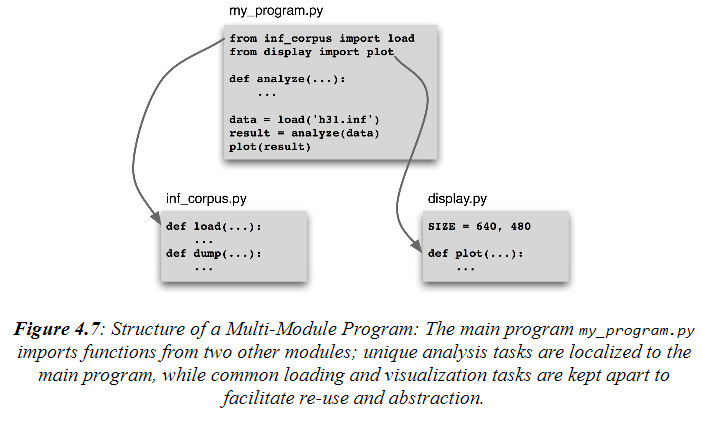

By dividing our work into several modules and using import statements to access functions defined elsewhere, we can **keep the individual modules simple and easy to maintain**. 

This approach will also result in a growing collection of modules, and make it possible for us to **build sophisticated systems** involving a hierarchy of modules.

<a name="error"></a>
## 4.6.3 Sources of Error
1. [Input Data](#inputdata)
2. [Supplied Function](#suppliedfunction)
3. [Python's Semantics](#pythonsemantics)

Mastery of programming depends on having a **variety of problem-solving skills** to draw upon when the program doesn't work as expected. 

Something as trivial as a mis-placed symbol might cause the program to behave very differently. We call these **"bugs"** because they are tiny in comparison to the damage they can cause. 

They creep into our code unnoticed, and **it's only much later** when we're running the program on some new data **that their presence is detected**.

Sometimes, fixing one bug only reveals another, and we get the distinct impression that the bug is on the move. The only reassurance we have is that **bugs are spontaneous** and not the fault of the programmer.

Flippancy aside, **debugging code is hard because there are so many ways for it to be faulty**. Our understanding of the input data, the algorithm, or even the programming language, may be at fault.

<a name="inputdata"></a>
### 4.6.3.1 Input Data

The input data may contain some **unexpected characters**. 

For example, WordNet synset names have the form `tree.n.01`, with three components separated using periods. 

The NLTK WordNet module initially decomposed these names using `split('.')`. 

However, this method broke when someone tried to look up the word PhD, which has the synset name `ph.d..n.01`, containing four periods instead of the expected two. 

The solution was to use `rsplit('.', 2)` to do at most two splits, using the rightmost instances of the period, and leaving the `ph.d.` string intact.

Although several people had tested the module before it was released, it was some [**weeks before someone detected the problem**](http://code.google.com/p/nltk/issues/detail?id=297).

<a name="suppliedfunction"></a>
### 4.6.3.2 Supplied Function

While testing NLTK's interface to WordNet, one of the authors noticed that no synsets had any antonyms defined, even though the underlying database provided a large quantity of antonym information. 

What **looked like a bug** in the WordNet interface turned out to be a **misunderstanding about WordNet itself**: antonyms are defined for lemmas, not for synsets. 

The only "bug" was a [**misunderstanding of the interface**](http://code.google.com/p/nltk/issues/detail?id=98).

<a name="pythonsemantics"></a>
### 4.6.3.3 Python's Semantics

It is easy to make the **wrong assumption about the relative scope of two operators**. 

For example, `"%s.%s.%02d" % "ph.d.", "n", 1` produces a run-time error **TypeError: not enough arguments for format string**. 

This is because the **percent operator has higher precedence than the comma operator**. The fix is to add parentheses in order to **force the required scope**.

As another example, suppose we are defining a function to **collect all tokens of a text having a given length**. 

The function has parameters for the text and the word length, and an extra parameter that allows the initial value of the result to be given as a parameter.

In [75]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result

print(find_words(['omg', 'teh', 'lolcat', 'sitted'
                  , 'on', 'teh', 'mat'], 3))

print(find_words(['omg', 'teh', 'lolcat', 'sitted',
                  'on', 'teh', 'mat'], 2, ['ur']))

print(find_words(['omg', 'teh', 'lolcat', 'sitted',
                  'on', 'teh', 'mat'], 3))

['omg', 'teh', 'teh', 'mat']
['ur', 'on']
['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']


The first time we call `find_words()`, we get all three-letter words **as expected**. 

The second time we specify an initial value for the result, a one-element list `['ur']`, and **as expected**, the result has this word along with the other two-letter word in our text. 

Now, the next time we call `find_words()` we use the same parameters as the first time, but we get a different result.

Each time we call `find_words()` with no third parameter, the result will simply extend the result of the previous call, rather than start with the empty result list as specified in the function definition. 

<a name="debug"></a>
## 4.6.4 Debugging Techniques

Since most code errors result from the **programmer making incorrect assumptions**, the first thing to do when you detect a bug is to **check your assumptions**. 

**Localize the problem by adding print statements** to the program, showing the value of important variables, and showing how far the program has progressed.

If the program produced an "exception" — a run-time error — the interpreter will print a **stack trace**, pinpointing the location of program execution at the time of the error. 

If the program depends on **input data**, try to reduce this to the smallest size while still producing the error.

Once you have localized the problem to a particular function, or to a line of code, you need to work out what is going wrong. It is often helpful to **recreate the situation using the interactive command line**. 

Define some variables then copy-paste the offending line of code into the session and see what happens. 

Check your understanding of the code by **reading some documentation**, and examining other code samples that purport to do the same thing that you are trying to do. 

Try **explaining your code to someone else**, in case they can see where things are going wrong.

Python provides a **debugger** which allows you to monitor the execution of your program, specify line numbers where execution will stop (i.e. **breakpoints**), and step through sections of code and inspect the value of variables. 

In [ ]:
import pdb
import mymodule

pdb.run(mymodule.myfunction())

It will present you with a **prompt (Pdb)** where you can type instructions to the debugger. 

**Common Commands**:
* **`help`** full list of commands. 

* **`step`** (or just s) executes the current line and stop. If the current line calls a function, it will enter the function and stop at the first line. 

* **`next`** (or just n) stops execution at the next line in the current function. 

* **`break`** (or b) command creates or lists breakpoints.

* **`continue`** (or c) continues execution as far as the next breakpoint. 

* Type the **name of any variable** to inspect its value.

We can use the Python debugger to locate the problem in our `find_words()` function. 

Remember that the problem arose the second time the function was called. 

We'll start by calling the function without using the debugger, using the smallest possible input. 

The second time, we'll call it with the debugger.

In [76]:
import pdb

print(find_words(['cat'], 3))

pdb.run("find_words(['dog'], 3)")

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat']
> <string>(1)<module>()

ipdb> step
--Call--
> c:\users\10inm\appdata\local\temp\ipykernel_14564\3001719944.py(1)find_words()

ipdb> args
text = ['dog']
wordlength = 3
result = ['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat']
ipdb> exit


Here we typed just two commands into the debugger: 
1. `step` took us inside the function
2. `args` showed the values of its arguments (or parameters). 

We see immediately that `result` has an initial value of `['cat']`, and not the empty list as expected. 

The debugger has helped us to localize the problem, prompting us to check our understanding of Python functions.

<a name="defprogramming"></a>
## 4.6.5 Defensive Programming

In order to avoid some of the pain of debugging, it helps to adopt some **defensive programming habits**. 

* Instead of writing a 20-line program then testing it, **build the program bottom-up out of small pieces that are known to work**. Each time you combine these pieces to make a larger unit, test it carefully to see that it works as expected. 

* Consider adding **assert statements to your code**, specifying properties of a variable, e.g. assert(isinstance(text, list)). If the value of the text variable later becomes a string when your code is used in some larger context, this will raise an AssertionError and you will get immediate notification of the problem.

* Once you think you've found the bug, **view your solution as a hypothesis**. Try to predict the effect of your bugfix before re-running the program. If the bug isn't fixed, don't fall into the trap of blindly changing the code in the hope that it will magically start working again. Instead, for each change, try to articulate a hypothesis about what is wrong and why the change will fix the problem. Then undo the change if the problem was not resolved.

As you develop your program, extend its functionality, and fix any bugs, it helps to **maintain a suite of test cases**. This is called **regression testing**, since it is meant to detect situations where the code "regresses" — where a change to the code has an unintended side-effect of breaking something that used to work. 

Python provides a simple regression testing framework in the form of the **`doctest` module**. This module searches a file of code or documentation for blocks of text that look like an interactive Python session, of the form you have already seen many times in this book. It executes the Python commands it finds, and tests that their output matches the output supplied in the original file. Whenever there is a mismatch, it reports the expected and actual values. For details please consult the doctest [documentation](http://docs.python.org/library/doctest.html). 

Apart from its value for regression testing, the doctest module is useful for **ensuring that your software documentation stays in sync with your code**.

Perhaps the most important defensive programming strategy is to **set out your code clearly**, **choose meaningful variable and function names**, and **simplify the code wherever possible** by decomposing it into functions and modules with well-documented interfaces.

<a name="algorithm"></a>
# 4.7 Algorithm Design
1. [Recursion](#recursion)
1. [Space-Time Tradeoffs](#tradeoffs)
1. [Dynamic Programming](#dynamic)

A major part of algorithmic problem solving is **selecting or adapting an appropriate algorithm for the problem at hand**. 

Sometimes there are several alternatives, and choosing the best one depends on knowledge about how each alternative performs as the size of the data grows.

The best known strategy is known as **divide-and-conquer**: we attack a problem of size `n` by dividing it into two problems of size `n/2`, solve these problems, and combine their results into a solution of the original problem. 

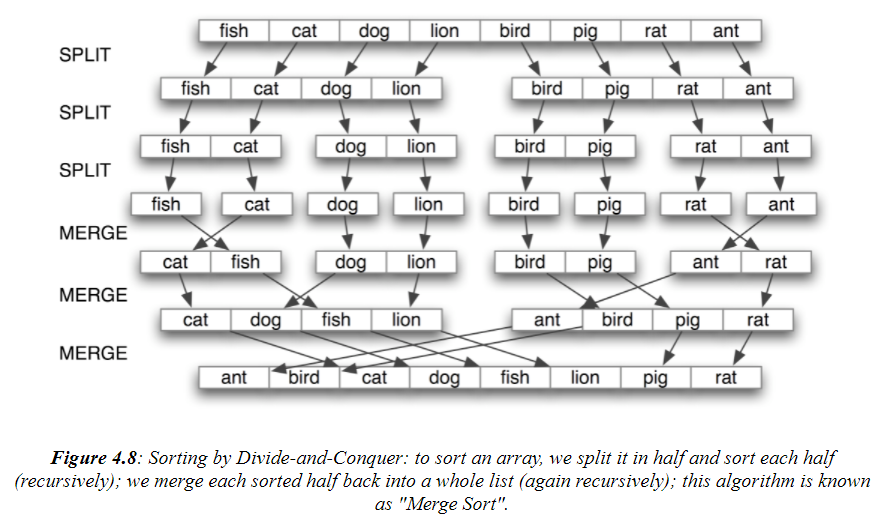

Another example is the **process of looking up a word in a dictionary**.

We open the book somewhere around the middle and compare our word with the current page. If it's earlier in the dictionary we repeat the process on the first half; if its later we use the second half. 

This search method is called **binary search** since it splits the problem in half at every step.


In another approach to algorithm design, we attack a problem by **transforming it into an instance of a problem we already know how to solve**. 

For example, in order to detect duplicate entries in a list, we can pre-sort the list, then scan through it once to check if any adjacent pairs of elements are identical.

<a name="recursion"></a>
## 4.7.1 Recursion

The above examples of sorting and searching have a **striking property**: to solve a problem of size `n`, we have to break it in half and then work on one or more problems of size `n/2`. 

A common way to implement such methods uses **recursion**. We define a function `f` which simplifies the problem, and **calls itself** to solve one or more easier instances of the same problem. 

It then combines the results into a solution for the original problem.

For example, suppose we have a set of `n` words, and want to calculate how many different ways they can be combined to make a sequence of words. 

If we have only one word (`n=1`), there is just one way to make it into a sequence. If we have a set of two words, there are two ways to put them into a sequence. For three words there are six possibilities.

In general, for `n` words, there are `n × n-1 × … × 2 × 1` ways (i.e. the **factorial of n**).

We can code this up as follows:

In [1]:
def factorial(n):
    result = 1
    for i in range(n):
        result *= (i+1)
    return result

factorial(3)

6

However, there is also a **recursive algorithm** for solving this problem, based on the following observation. 

Suppose we have a way to construct all orderings for `n-1` distinct words. Then for each such ordering, there are `n` places where we can insert a new word: at the start, the end, or any of the `n-2` boundaries between the words. 

Thus we simply multiply the number of solutions found for `n-1` by the value of `n`. 

We also need the **base case**, to say that if we have a single word, there's just one ordering. 

We can code this up as follows:

In [5]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        print(n)
        return n* factorial2(n-1)
    
factorial2(3)

3
2


6

These two algorithms solve the same problem. One uses **iteration** while the other uses **recursion**. 

We can use recursion to **navigate a deeply-nested object**, such as the WordNet hypernym hierarchy. 

Let's count the size of the hypernym hierarchy rooted at a given synset `s`. 

We'll do this by finding the size of each hyponym of `s`, then adding these together (we will also add 1 for the synset itself). 

The following function `size1()` does this work; notice that the body of the function includes a recursive call to `size1()`:

In [3]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

We can also design an **iterative solution** to this problem which processes the hierarchy in layers.

In [10]:
def size2(s):
    # the synset itself
    layer = [s]
    total = 0
    while layer:
        # keep track of total synsets
        total += len(layer)
        # all hyponyms of synset
        layer = [h for c in layer for h in c.hyponyms()]
    return total

from nltk.corpus import wordnet as wn

dog = wn.synset('dog.n.01')
print(size1(dog))
print(size2(dog))

190
190


Each time through the loop it computes the next layer by finding the hyponyms of everything in the last layer.

Not only is **the iterative solution much longer**, it is **harder to interpret**. 

It **forces us to think procedurally**, and keep track of what is happening with the layer and total variables through time.

As a final example of recursion, let's use it to **construct a deeply-nested object**. 

A **letter trie** (based on the word **retrieval**) is a data structure that can be used for indexing a lexicon, one letter at a time. 

For example, if trie contained a letter trie, then `trie['c']` would be a smaller trie which held all words starting with c. 

The program below demonstrates the recursive process of building a trie, using Python dictionaries. 

To insert the word `chien`, we split off the `c` and recursively insert `hien` into the sub-trie `trie['c']`. 

The recursion continues until there are no letters remaining in the word, when we store the intended value (in this case, the word `dog`).

In [16]:
import pprint

def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value
            
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
trie = dict(trie)
trie['c']['h']['i']['e']['n']['value']
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


Each level of nesting contains **all words with a given prefix**, and a **sub-trie containing all possible continuations**.

Despite the **simplicity of recursive programming**, it comes with a **cost**.

Each time a function is called, some state information needs to be pushed on a stack, so that once the function has completed, execution can continue from where it left off. 

For this reason, **iterative solutions are often more efficient than recursive solutions**.

<a name="tradeoffs"></a>
## 4.7.2 Space-Time Tradeoffs

We can sometimes significantly **speed up the execution** of a program by building an **auxiliary data structure**, such as an **index**.

An example of a space-time tradeoff is **maintaining a vocabulary list**. 

If you need to process an input text to check that all words are in an existing vocabulary, the **vocabulary should be stored as a set, not a list**. 

The elements of a set are **automatically indexed**, so testing membership of a large set will be much faster than testing membership of the corresponding list.

We can test this claim using the **timeit** module. The **Timer** class has two parameters, a statement which is executed multiple times, and setup code that is executed once at the beginning.

In [17]:
from timeit import Timer
from random import randint

vocab_size = 100_000
setup_list = 'import random; vocab = range (%d)' % vocab_size
setup_set = 'import random; vocab = set(range(%d))' % vocab_size
statement = 'random.randint(0, %d) in vocab' % (vocab_size * 2)
print(Timer(statement, setup_list).timeit(1000))
print(Timer(statement, setup_set).timeit(1000))

0.0019179999999323627
0.0027199999999538704


<a name="dynamic"></a>
## 4.7.3 Dynamic Programming

Dynamic programming is **a general technique for designing algorithms which is widely used in natural language processing**. 

The **term 'programming'** is used in a different sense to what you might expect, to **mean planning or scheduling**. 

Dynamic programming is used when a problem contains **overlapping sub-problems**. Instead of computing solutions to these sub-problems repeatedly, we simply store them in a lookup table. 

In the remainder of this section we will introduce dynamic programming, but in a rather different context to syntactic parsing.

Pingala was an Indian author who lived around the 5th century B.C., and wrote a treatise on Sanskrit prosody called the Chandas Shastra. Virahanka extended this work around the 6th century A.D., studying **the number of ways of combining short and long syllables to create a meter of length n**. 

**Short syllables**, marked `S`, take up **one unit of length**, while **long syllables**, marked `L`, take **two**. 

Pingala found, for example, that there are five ways to construct a meter of length 4: `V4 = {LL, SSL, SLS, LSS, SSSS}`. Observe that we can split V4 into two subsets, those starting with L and those starting with S.

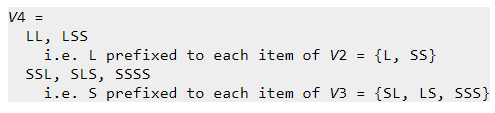

In [22]:
def virahanka1(n):
    if n == 0:
        return[""]
    elif n == 1:
        return["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l
    
def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s+l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return[""]
    elif n == 1:
        return["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l
    
print(virahanka1(4))
print(virahanka2(4))
print(virahanka3(4))
print(virahanka4(4))

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']
['SSSS', 'SSL', 'SLS', 'LSS', 'LL']
['SSSS', 'SSL', 'SLS', 'LSS', 'LL']
['SSSS', 'SSL', 'SLS', 'LSS', 'LL']


These are four ways to **compute Sanskrit Meter**:
1. recursive
2. bottom-up dynamic programming
3. top-down dynamic programming
4. built-in memoization.

Notice that in the **recursive** function, in order to compute V4 we first compute V3 and V2. But to compute V3, we need to first compute V2 and V1. This **call structure** is depicted below.

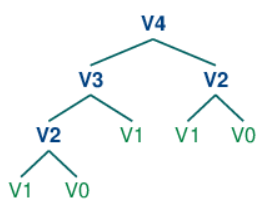

As you can see, **V2 is computed twice**. 

This might not seem like a significant problem, but it turns out to be rather **wasteful as `n` gets large**: to compute V20 using this recursive technique, we would compute `V2` **4,181 times**; and for `V40` we would compute `V2` **63,245,986 times**! 

A much better alternative is to **store the value of `V2` in a table** and look it up whenever we need it. The same goes for other values, such as `V3` and so on. Function `virahanka2()` implements a **dynamic programming approach** to the problem. 

It works by filling up a table (called **lookup**) with solutions to all smaller instances of the problem, stopping as soon as we reach the value we're interested in. At this point we read off the value and return it. Crucially, **each sub-problem is only ever solved once**.

Notice that the approach taken in virahanka2() is to **solve smaller problems on the way to solving larger problems**. Accordingly, this is known as the **bottom-up approach to dynamic programming**.

Unfortunately it turns out to be quite **wasteful for some applications**, since it **may compute solutions to sub-problems that are never required for solving the main problem**. 

This wasted computation can be avoided using the **top-down approach to dynamic programming** (`virahanka3()`). Unlike the bottom-up approach, this approach is **recursive**. 

It avoids the huge wastage of `virahanka1()` by checking whether it has previously stored the result. If not, it **computes the result recursively and stores it in the table**. The last step is to return the stored result. 

The final method, in `virahanka4()`, is to use a **Python "decorator"** called `memoize`, which **takes care of the housekeeping work** done by `virahanka3()` without cluttering up the program. 

This **"memoization" process** stores the result of each previous call to the function along with the parameters that were used. If the function is subsequently called with the same parameters, it **returns the stored result instead of recalculating it**.

<a name="samplelibs"></a>
# 4.8 A Sample of Python Libraries
1. [Matplotlib](#matplotlib)
1. [NetworkX](#networkx)

<a name="matplotlib"></a>
## 4.8.1 Matplotlib

Python has some libraries that are useful for **visualizing language data**.

So far we have focused on textual presentation and the use of formatted print statements to get output lined up in columns. It is often very useful to **display numerical data in graphical form**, since this often makes it **easier to detect patterns**.

C:\Users\10inm\AppData\Local\Temp/ipykernel_10676/1837359140.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pyplot.show()


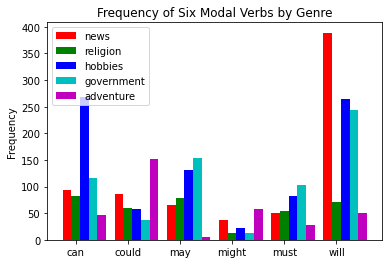

In [28]:
from numpy import arange
from matplotlib import pyplot
from nltk import ConditionalFreqDist
from nltk.corpus import brown

colors = 'rgbcmyk'

def bar_chart(categories, words, counts):
    """Plot a bar chart showing counts for each word by category."""
    ind = arange(len(words))
    width = 1 / (len(categories) +1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()
    
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = ConditionalFreqDist(
                (genre, word)
                for genre in genres
                for word in brown.words(categories=genre)
                if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

From the bar chart it is **immediately obvious** that may and must have almost identical relative frequencies. The same goes for could and might.

It is also possible to generate such **data visualizations on the fly**. 

For example, a web page with form input could permit visitors to specify search parameters, submit the form, and see a **dynamically generated visualization**. 

To do this we have to specify the `Agg` **backend** for matplotlib, which is a library for producing raster (pixel) images. Next, we use all the same Matplotlib methods as before, but instead of displaying the result on a graphical terminal using `pyplot.show()`, we save it to a file using `pyplot.savefig()`. We specify the filename then print HTML markup that directs the web browser to load the file.

In [29]:
from matplotlib import use, pyplot

use('Agg')
pyplot.savefig('modals.png')
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


<Figure size 432x288 with 0 Axes>

<a name="networkx"></a>
## 4.8.2 NetworkX

The NetworkX package is for **defining and manipulating structures consisting of nodes and edges, known as graphs**.

NetworkX can be **used in conjunction with Matplotlib to visualize networks**, such as WordNet. 

The program in 4.15 initializes an empty graph [3] then traverses the WordNet hypernym hierarchy adding edges to the graph [1]. Notice that the traversal is recursive [2].

C:\Users\10inm\AppData\Local\Temp/ipykernel_10676/292442330.py:22: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  matplotlib.pyplot.show()


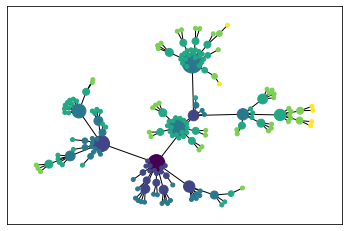

In [35]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)
        
def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.drawing.nx_pylab.draw_networkx(graph,
                    node_size = [16 * graph.degree(n) for n in graph],
                    node_color = [graph.depth[n] for n in graph],
                    with_labels = False)
    matplotlib.pyplot.show()
    
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

Part of the WordNet **hypernym hierarchy** is displayed, starting with `dog.n.01` (the darkest node in the middle); **node size is based on the number of children of the node**, and **color is based on the distance of the node from `dog.n.01`**.